# PROJETO 1 - Ciência dos Dados
 ## Ellen Beatriz Shen | 2B Engenharia

 ___

## Perguntas a serem respondidas:

**Pergunta 1:** É possível constatar que o "PIB per capita" da Espanha, em relação a países similares a ele, foi aumentado ao entrar na União Europeia? Podemos dizer que ocorreu uma evolução relativa melhor?


## Explicação da hipótese e mecanismo

A **União Europeia** é um bloco econômico e político constituido por 28 países europeus. Seus objetivos são ajudar os países-membros no seu desenvolvimento econômico, dar mais igualdade política e econômica à Europa, melhorar as condições econômicas e de trabalho dos cidadãos europeus, reduzir as desigualdades econômicas e sociais entre todas as regiões que compõem o bloco, garantir a permanência de um ambiente pacífico e harmonioso em toda a Europa. Suas características são livre circulação das pessoas pelos Estados-membros, livre circulação de mercadorias entre os Estados-membros, integração política, adoção de uma moeda única, o Euro.

- Como um dos objetivos principais da UE é o desenvolvimento econômico de seus países-membros, a hipótese busca comparar os dados de países pertencentes e não pertencentes a este bloco econômico. A análise vai ser baseada em um grupo de países que são economicamente similares, e que somente alguns entraram para a UE. Assim podemos utilizar variáveis como o 'PIB per capita' ao longo dos anos para a comparação.

## Bases de dados utilizadas

- dados retirados de https://www.gapminder.org/data/


___

## Análise dos Dados 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Leitura dos Dados
PIB = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')
renda = pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')
mundo = pd.read_excel('WorldBank.xlsx')

In [3]:
dados_PIB = PIB.set_index("country")
dados_renda = renda.set_index("country")
dados_mundo = mundo.set_index("Country")

In [4]:
dados_regiao = dados_mundo.loc[:,["Country","region"]]
dataframe_regiao = dados_regiao.set_index("Country")
#europa = dataframe_regiao.loc[(dataframe_regiao.region=='europe_west') | (dataframe_regiao.region=='europe_east'),:]
europa = ['Andorra',  'Austria', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina',  'Cyprus',  'Czech Republic','Denmark', 'Spain',  'Estonia', 'Finland',  'France', 'United Kingdom',  'Greece', 'Croatia', 'Hungary', 'Ireland',  'Iceland',  'Italy',  'Lithuania', 'Latvia',  'Monaco',  'Moldova', 'Malta',  'Montenegro', 'Netherlands',  'Poland',  'Portugal',  'Romania',  'Slovak Republic', 'Slovenia',  'Sweden',  'Turkey', 'Luxembourg', 'Germany']
uniao_europeia = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']



/Users/ellenbeatriz/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


### PIB

In [5]:
PIB_espanha = dados_PIB.loc["Spain",:]

In [6]:
PIB_espanha_antes = PIB_espanha[(PIB_espanha.index>1962) & (PIB_espanha.index<1986)]

PIB_espanha_depois = PIB_espanha[(PIB_espanha.index>1986)]

Text(0, 0.5, 'PIB Espanha')

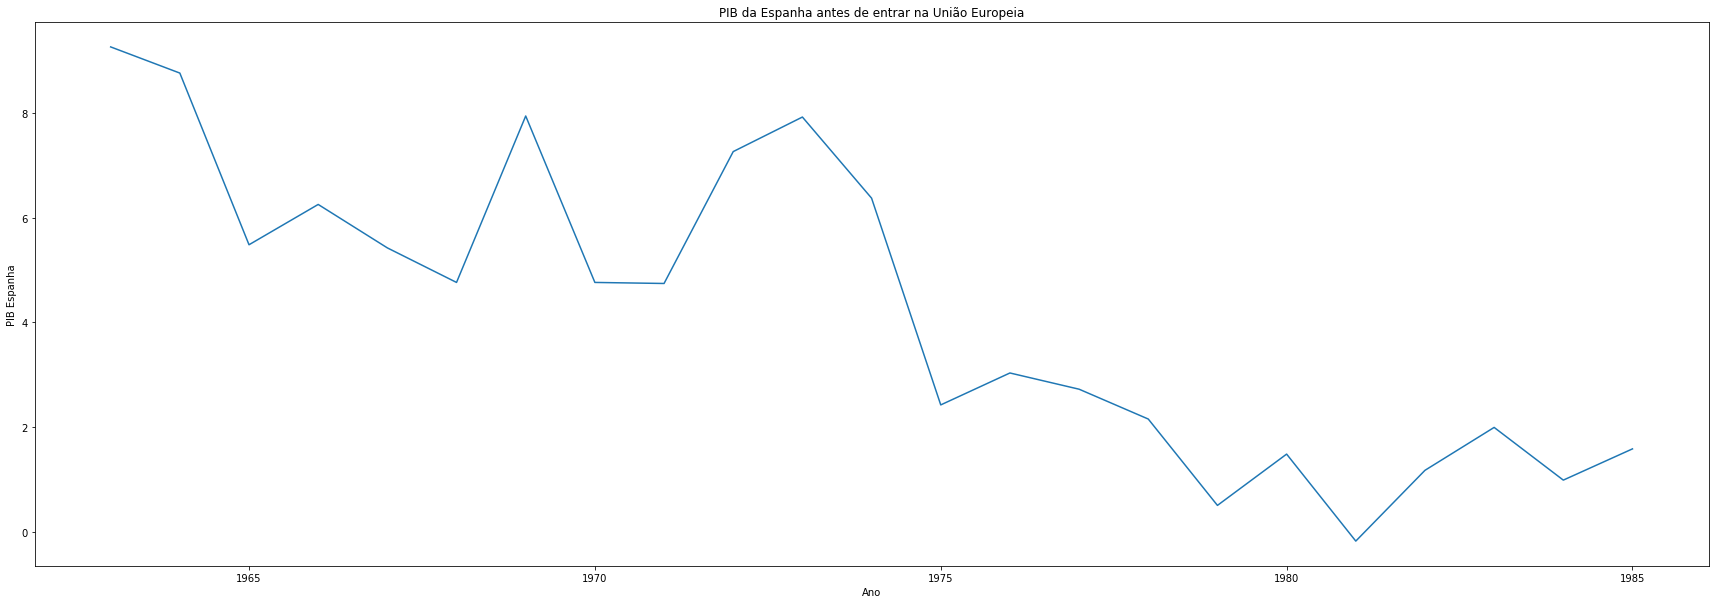

In [7]:
plt.figure(figsize=(30,10))
plt.plot(PIB_espanha_antes.index,PIB_espanha_antes)
plt.title('PIB da Espanha antes de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('PIB Espanha')

In [8]:
media_PIB_antes = PIB_espanha_antes.mean()
media_PIB_antes

4.207000000000001

Text(0, 0.5, 'PIB Espanha')

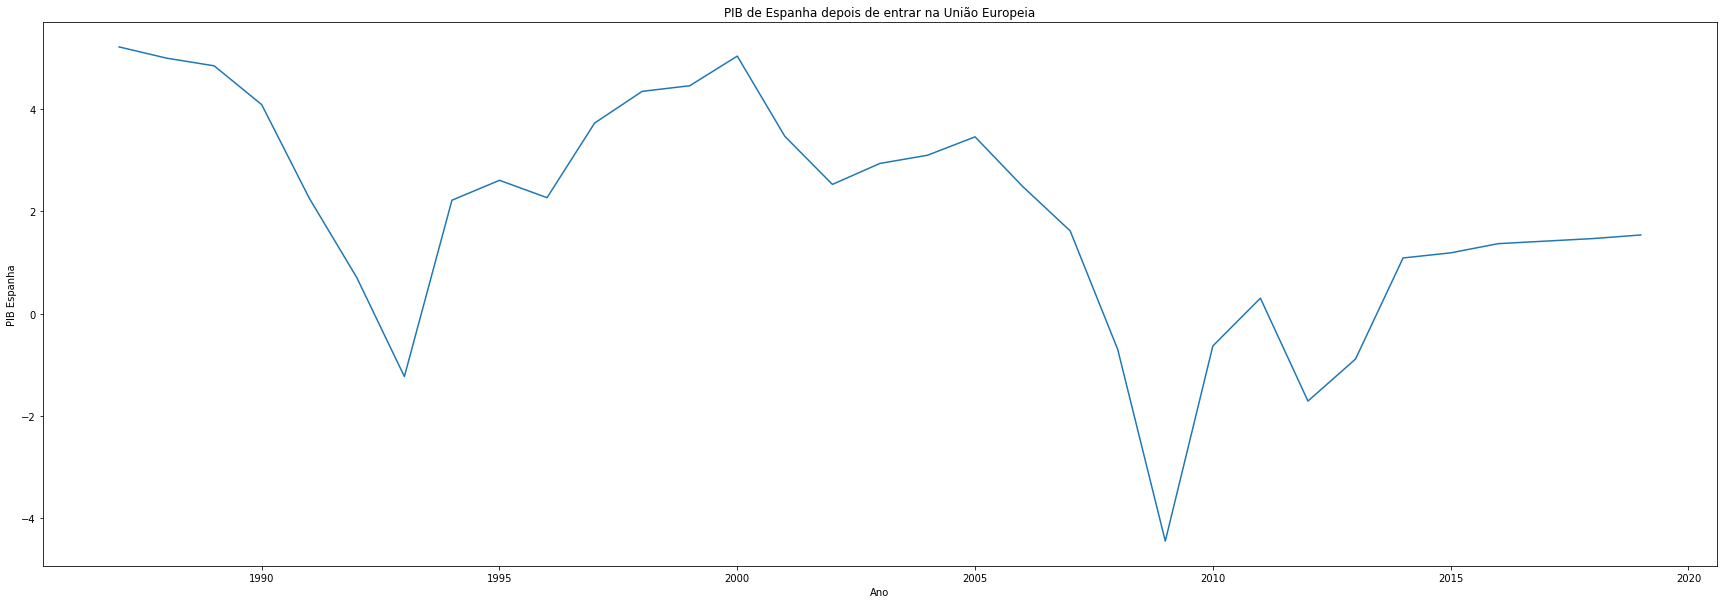

In [9]:
plt.figure(figsize=(30,10))
plt.plot(PIB_espanha_depois.index,PIB_espanha_depois)
plt.title('PIB de Espanha depois de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('PIB Espanha')

In [10]:
media_PIB_depois = PIB_espanha_depois.mean()
media_PIB_depois

1.975393939393939

In [11]:
dados_comparacao = {
'Época': ['Antes', 'Depois'],
'Média': [media_PIB_antes,media_PIB_depois]}
media_espanha = pd.DataFrame(dados_comparacao, columns=['Época', 'Média'])


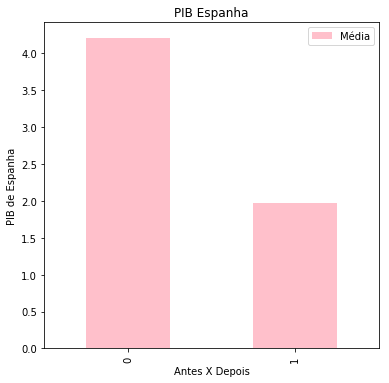

In [12]:
plot = media_espanha.plot(kind='bar',title='PIB Espanha',figsize=(6, 6),color=('pink','blue'))
plt.ylabel('PIB de Espanha')
plt.xlabel('Antes X Depois')
plt.show()

Text(0, 0.5, 'PIB Espanha')

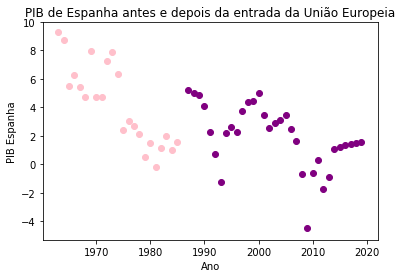

In [13]:
plt.scatter(PIB_espanha_antes.index, PIB_espanha_antes, color="pink")
plt.scatter(PIB_espanha_depois.index, PIB_espanha_depois, color="purple")
plt.title('PIB de Espanha antes e depois da entrada da União Europeia')
plt.xlabel('Ano')
plt.ylabel('PIB Espanha')

In [14]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Retas PIB da Espanha antes e depois da entrada da União Europeia')
    plt.xlabel('Anos')
    plt.ylabel('PIB Espanha')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


In [15]:
index_antes = PIB_espanha_antes.reset_index()
index_depois = PIB_espanha_depois.reset_index()

Ajuste linear entre:
Coeficiente linear: 708.0862450592886
Coeficiente angular: -0.3565750988142293
Ajuste linear entre:
Coeficiente linear: 247.88180269607844
Coeficiente angular: -0.12276905080213904


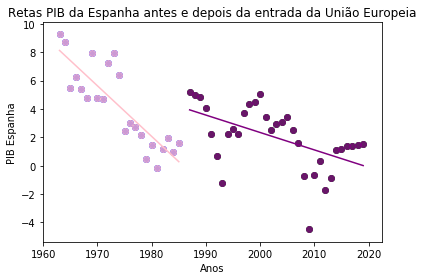

In [16]:
plt.scatter(index_antes["index"], index_antes.Spain, color="b")
reta(index_antes["index"], index_antes.Spain, "pink")
plt.scatter(index_depois["index"], index_depois.Spain, color="g")
reta(index_depois["index"], index_depois.Spain, "purple")

In [17]:
#Filtração do PIB 
dataframe_pib_eu = dados_PIB.loc[:,"Europa"] = "não"
dataframe_pib_eu = dados_PIB.loc[europa, "Europa"] = "sim"

In [18]:
PIB_europa = dados_PIB.loc[dados_PIB.Europa=="sim",:]

In [19]:
#Filtraçào da Renda dos países da Europa
renda_portugal = dados_renda.loc["Portugal",:]
dataframe_renda_eu = dados_renda.loc[:,"Europa"] = "não"
dataframe_renda_eu =  dados_renda.loc[europa, "Europa"] = "sim"

In [20]:
renda_europa = dados_renda.loc[dados_renda.Europa=="sim",:]

In [25]:
#Países da UE
dataframe_pib_ue = PIB_europa.loc[:,"União Europeia"] = "não"
dataframe_pib_ue = PIB_europa.loc[uniao_europeia, "União Europeia"] = "sim"


In [22]:
PIB_UE = PIB_europa.loc[PIB_europa["União Europeia"]=="sim",:]

In [23]:
PIB_resto = PIB_europa.loc[PIB_europa["União Europeia"]=="não",:]